In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [5]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


* Converting the Quarters into Years

In [8]:
df['Quarters_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
df.head()

,Quarter,Sales,Quarters_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


* Coverting Quarter Years with Quarter Start Date Year (Date Month and Year)

In [9]:
df['Date'] = pd.to_datetime(df['Quarters_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),
                           dayfirst=True)
df.head()

,Quarter,Sales,Quarters_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [10]:
df['Quarters'] =  df['Quarter'].apply(lambda x: x[:2])

In [11]:
df

,Quarter,Sales,Quarters_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [12]:
dummy = pd.DataFrame(pd.get_dummies(df['Quarters']))
df1 = pd.concat((df, dummy), axis=1)

df1.head()

,Quarter,Sales,Quarters_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


* Dropping all the unnecessary column

In [13]:
df1.drop(['Quarter','Quarters_Year'] , axis =1, inplace = True)
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


* Making the Date as DateTime index for the Dataframe

In [14]:
df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [15]:
df1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


* Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

In [16]:
df1["t"]=np.arange(1,43)

df1["t_square"]=np.square(df1["t"])

df1["Log_Sales"]=np.log(df1["Sales"])

df1.head()


,Sales,Quarters,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
Date,,,,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0,1,1,7.458663
1986-04-01,2244.960999,Q2,0,1,0,0,2,4,7.716443
1986-07-01,2533.804993,Q3,0,0,1,0,3,9,7.837477
1986-10-01,2154.962997,Q4,0,0,0,1,4,16,7.675529
1987-01-01,1547.818996,Q1,1,0,0,0,5,25,7.344602


<Axes: xlabel='Date'>

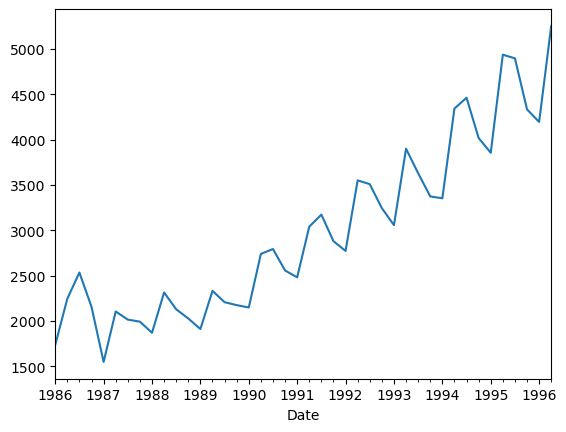

In [17]:
df1.Sales.plot()

<Axes: >

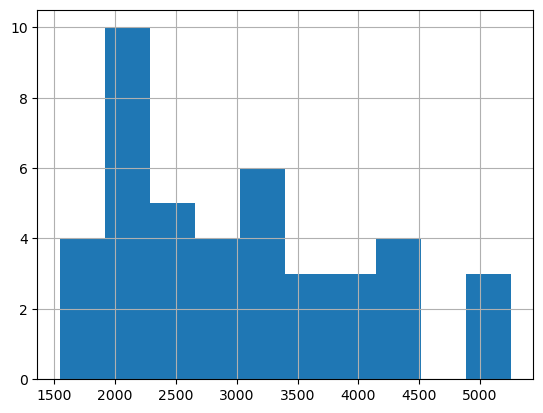

In [18]:
df1.Sales.hist()

<Axes: xlabel='Quarters', ylabel='Date'>

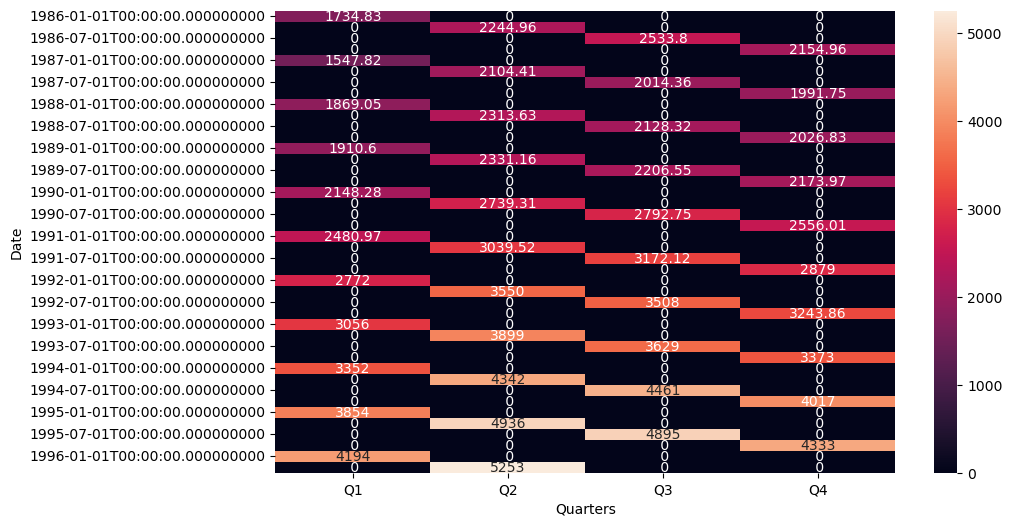

In [19]:
plt.figure(figsize=(10,6))
Y_Quarter=pd.pivot_table(data=df1,values="Sales",index="Date",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(Y_Quarter,annot=True,fmt="2g")

<Axes: ylabel='Density'>

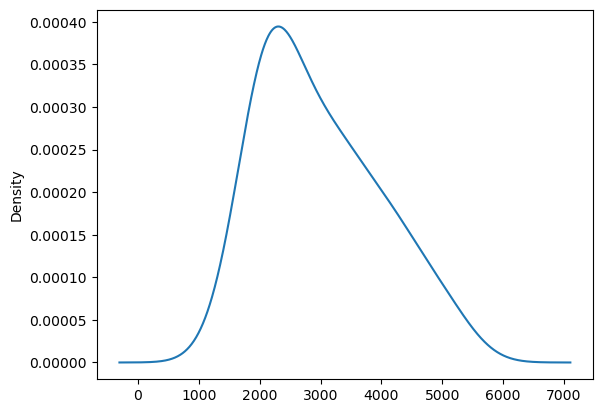

In [20]:
#Density plot and Lag plot

df1.Sales.plot(kind='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

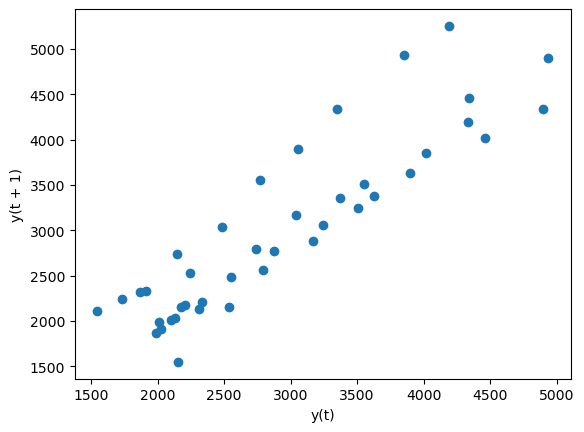

In [21]:
lag_plot(df1.Sales)

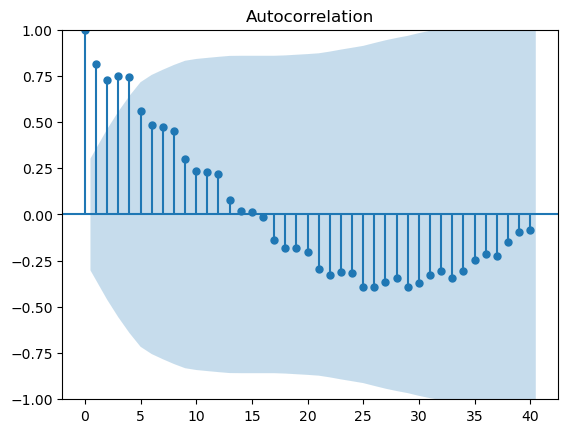

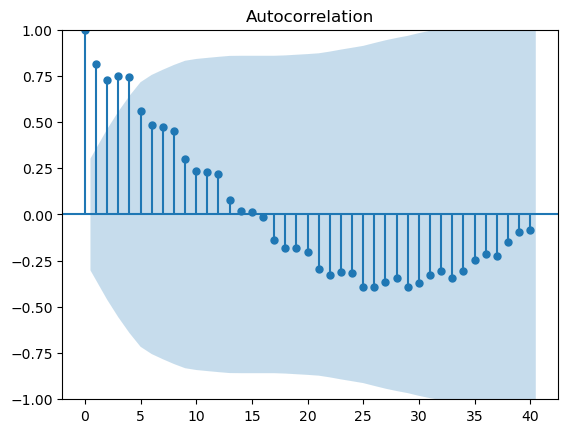

In [22]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.Sales,lags=40)

In [23]:
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Quarter,Sales,Quarters_Year,Date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988


<Axes: xlabel='year', ylabel='Sales'>

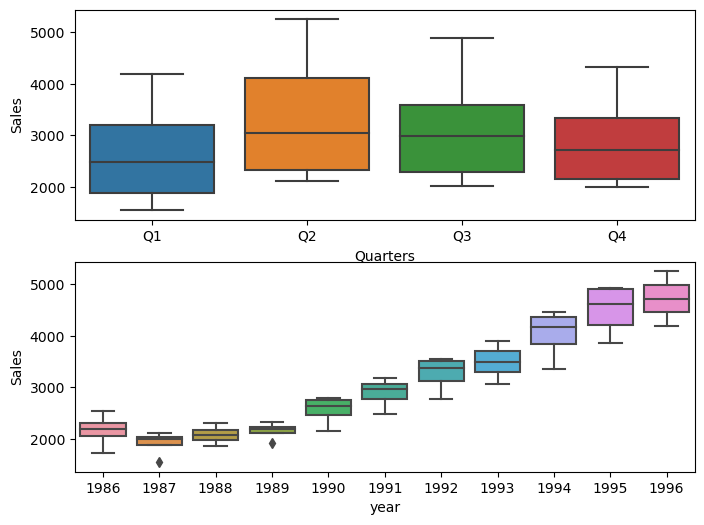

In [24]:
# Boxplot 

plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=df1)

plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df)

In [25]:
df1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
Date,,,,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0,1,1,7.458663
1986-04-01,2244.960999,Q2,0,1,0,0,2,4,7.716443
1986-07-01,2533.804993,Q3,0,0,1,0,3,9,7.837477
1986-10-01,2154.962997,Q4,0,0,0,1,4,16,7.675529
1987-01-01,1547.818996,Q1,1,0,0,0,5,25,7.344602


<Axes: xlabel='Quarters', ylabel='Sales'>

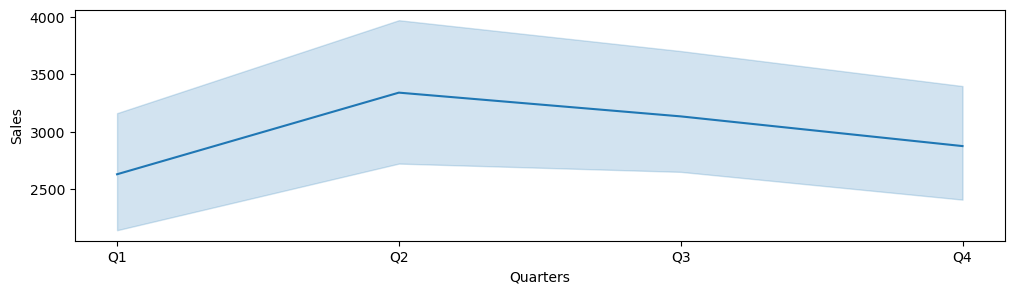

In [26]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarters", y="Sales", data=df)

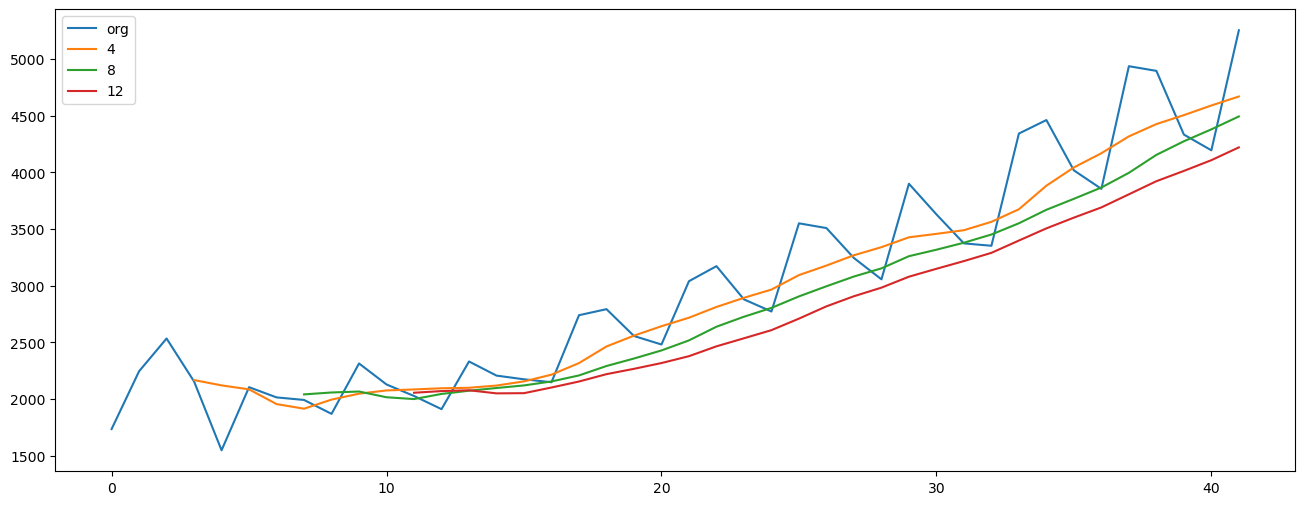

In [27]:
plt.figure(figsize=(16,6))
df.Sales.plot(label="org")
for i in range(4,13,4):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

* Splitting the Data into train and test 

In [28]:
train=df1.head(int(len(df1.Quarters)*0.9))
test=df1.tail(len(df1.Quarters)-len(train))

In [29]:
train.head()

,Sales,Quarters,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
Date,,,,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0,1,1,7.458663
1986-04-01,2244.960999,Q2,0,1,0,0,2,4,7.716443
1986-07-01,2533.804993,Q3,0,0,1,0,3,9,7.837477
1986-10-01,2154.962997,Q4,0,0,0,1,4,16,7.675529
1987-01-01,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [30]:
#Linear Model
import statsmodels.formula.api as smf
Linear_model=smf.ols("Sales~t",data=train).fit()
pred_linear=Linear_model.predict(test["t"])
rmse_linear=np.sqrt(np.mean(test["Sales"]-np.array(pred_linear))**2)
rmse_linear

613.088579779634

In [31]:
#Exponential
exp_model=smf.ols("Log_Sales~t",data=train).fit()
pred_exp_model=exp_model.predict(test["t"])
rmse_exp_model=np.sqrt(np.mean((test["Sales"])-(np.array(pred_exp_model)))**2)
rmse_exp_model

4713.8306396253665

In [32]:
#Quadratic
Quad=smf.ols("Sales~t+t_square",data=train).fit()
pred_Quad=Quad.predict(test[["t","t_square"]])
rmse_Quad=np.sqrt(np.mean((test["Sales"])-(np.array(pred_Quad)))**2)
rmse_Quad

37.603993337860814

In [33]:
#Additive seasonality
Add_sea=smf.ols("Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea=Add_sea.predict(test[["Q1","Q2","Q3","Q4"]])
rmse_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_add_sea)))**2)
rmse_add_sea

1916.7936732906753

In [34]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols("Sales~t+t_square+Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea_quad=add_sea_quad.predict(test[["t","t_square","Q1","Q2","Q3","Q4"]])
rmse_add_sea_quad=np.sqrt(np.mean(test["Sales"]-np.array((pred_add_sea_quad)))**2)
rmse_add_sea_quad

108.68666897486692

In [35]:
# Multiplicative Seasonality
mul_sea=smf.ols("Log_Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_Mult_sea=mul_sea.predict(test[["Log_Sales","Q1","Q2","Q3","Q4"]])
rmse_Mult_sea=np.sqrt(np.mean(test["Sales"]-(np.array(np.exp(pred_Mult_sea))))**2)
rmse_Mult_sea

2009.5556325551377

In [36]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols("Log_Sales~t+Q1+Q2+Q3+Q4",data=train).fit()
pred_mul_add_sea=mul_add_sea.predict(test)
rmse_mul_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_mul_add_sea)))**2)
rmse_mul_add_sea

4713.803270264603

* Fit ARIMA model

<Axes: xlabel='Date'>

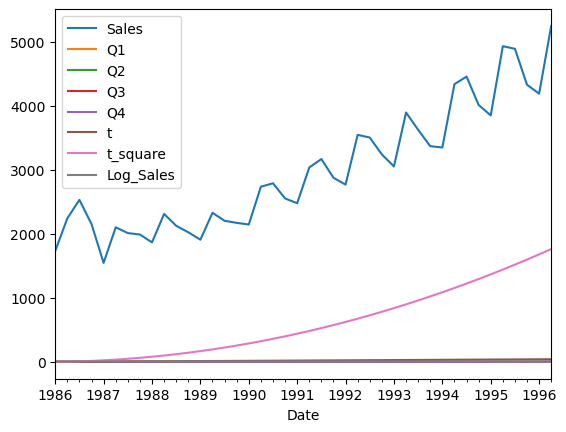

In [37]:
df1.plot()

<Axes: >

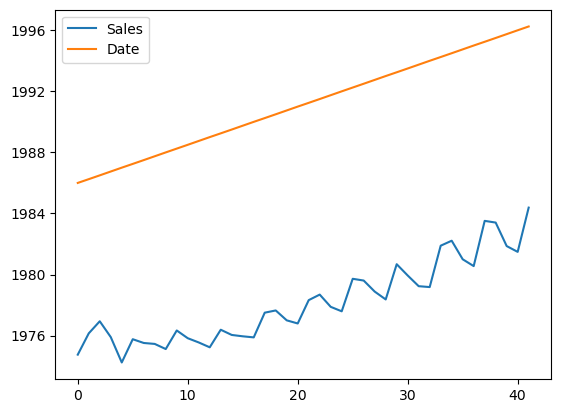

In [38]:
df.plot()

* importing the necessary package for dickey fuller test

In [39]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
       print("Strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary")
    else:
       print("Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary")

In [40]:
adf_test(df1['Sales'])

ADF Statistics: 1.3094210153268104
p-value: 0.9966611673930905
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


In [41]:
df1['Sales First Difference']=df1['Sales']-df1['Sales'].shift(1)
df1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4,t,t_square,Log_Sales,Sales First Difference
Date,,,,,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0,1,1,7.458663,NaN
1986-04-01,2244.960999,Q2,0,1,0,0,2,4,7.716443,510.133999
1986-07-01,2533.804993,Q3,0,0,1,0,3,9,7.837477,288.843994
1986-10-01,2154.962997,Q4,0,0,0,1,4,16,7.675529,-378.841995
1987-01-01,1547.818996,Q1,1,0,0,0,5,25,7.344602,-607.144001


In [42]:
adf_test(df1['Sales First Difference'].dropna())

ADF Statistics: -2.5015370020337997
p-value: 0.11510080332405515
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


* data is still not stationary.

In [43]:
df1['Sales Second Difference'] = df1['Sales First Difference']-df1['Sales First Difference'].shift(1)

adf_test(df1['Sales Second Difference'].dropna())

ADF Statistics: -27.63262494638169
p-value: 0.0
Strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary


* data is  stationary.

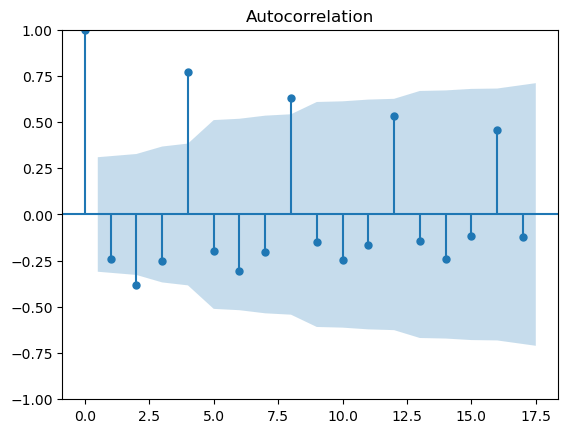

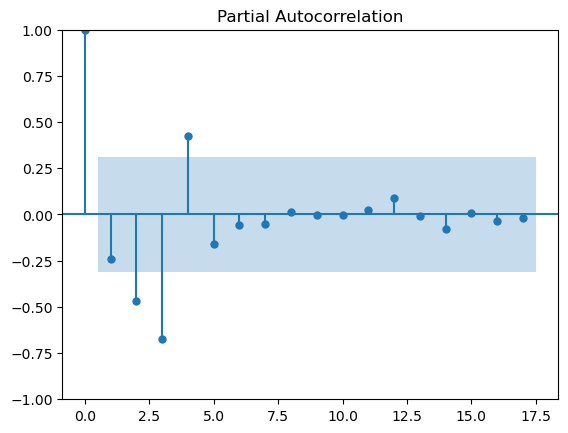

In [44]:
acf = plot_acf(df1['Sales Second Difference'].dropna())

pacf = plot_pacf(df1['Sales Second Difference'].dropna())

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
import statsmodels.tsa.statespace.sarimax

In [48]:
arima_model = ARIMA(train['Sales'], order=(3, 2, 3))
arima_fit = arima_model.fit()

In [49]:
# Make predictions on the test set
arima_predictions = arima_fit.forecast(steps=len(test))
arima_predictions

1995-04-01    4702.491113
1995-07-01    4859.572080
1995-10-01    4439.802291
1996-01-01    4327.914365
1996-04-01    5123.662794
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [50]:
# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(test['Sales'], arima_predictions))
print('RMSE (ARIMA):', rmse_arima)

arima_fit.summary()

RMSE (ARIMA): 142.72311453235525


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   37
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -234.434
Date:                Fri, 19 Jan 2024   AIC                            482.869
Time:                        10:34:42   BIC                            493.756
Sample:                    01-01-1986   HQIC                           486.627
                         - 01-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9511      0.077    -12.382      0.000      -1.102      -0.801
ar.L2         -0.9871      0.087    -11.372      0.000      -1.157      -0.817
ar.L3         -0.9127      0.094     -9.689      0.000      -1.097      -0.728
ma.L1         -0.1533      0.263     -0.582      0.560      -0.669       0.363
ma.L2         -0.2068      0.319     -0.649      0.516      -0.831       0.418
ma.L3         -0.2616      0.418     -0.625      0.532      -1.082       0.559
sigma2       2.88e+04   7540.532      3.820      0.000     1.4e+04    4.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.83   Prob(JB):                         0.96
Heteroskedasticity (H):               0.62   Skew:                            -0.08
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# Fit SARIMA model
sarima_model = SARIMAX(train['Sales'], order=(3, 2, 3), seasonal_order=(0, 0, 0, 12))
sarima_fit = sarima_model.fit()

In [52]:
sarima_predictions = sarima_fit.forecast(steps=len(test))
sarima_predictions

1995-04-01    4702.491113
1995-07-01    4859.572080
1995-10-01    4439.802291
1996-01-01    4327.914365
1996-04-01    5123.662794
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [53]:
# Calculate RMSE
rmse_sarima = np.sqrt(mean_squared_error(test['Sales'], sarima_predictions))
print('RMSE (SARIMA):', rmse_sarima)

RMSE (SARIMA): 142.72311453235525


In [54]:
# Optional: Print model summary
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   37
Model:               SARIMAX(3, 2, 3)   Log Likelihood                -234.434
Date:                Fri, 19 Jan 2024   AIC                            482.869
Time:                        10:34:43   BIC                            493.756
Sample:                    01-01-1986   HQIC                           486.627
                         - 01-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9511      0.077    -12.382      0.000      -1.102      -0.801
ar.L2         -0.9871      0.087    -11.372      0.000      -1.157      -0.817
ar.L3         -0.9127      0.094     -9.689      0.000      -1.097      -0.728
ma.L1         -0.1533      0.263     -0.582      0.560      -0.669       0.363
ma.L2         -0.2068      0.319     -0.649      0.516      -0.831       0.418
ma.L3         -0.2616      0.418     -0.625      0.532      -1.082       0.559
sigma2       2.88e+04   7540.532      3.820      0.000     1.4e+04    4.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.83   Prob(JB):                         0.96
Heteroskedasticity (H):               0.62   Skew:                            -0.08
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_mul_add_sea","rmse_ARIMA","rmse_SARIMAX"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_mul_add_sea,rmse_arima,rmse_sarima])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
2,rmse_Quad,37.603993
4,rmse_add_sea_quad,108.686669
7,rmse_ARIMA,142.723115
8,rmse_SARIMAX,142.723115
0,rmse_linear,613.088580
3,rmse_add_sea,1916.793673
5,rmse_Mult_sea,2009.555633
6,rmse_mul_add_sea,4713.803270
1,rmse_exp_model,4713.830640


*  QUADRATIC MODEL GIVES US THE BETTER RESULTS THAN REST OF THE MODELS APPLIED FOR GIVEN DATASET